#### Exploratory Data Analysis

##### Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
##### It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

setwd("C:/Users/devops/MachineLearningwithR/Day3-ExploratoryDataAnalysis")  #setting work directory (\ does not work on windows so it is replaced with /)#### Housing Data Exploratory Analysis

In [10]:
setwd("C:/Users/devops/MachineLearningwithR/Day3-ExploratoryDataAnalysis")  #setting work directory (\ does not work on windows so it is replaced with /)

#### EDA process visually
![image.png](./EDA.PNG)

In [11]:
library('ggvis')
library('ggplot2')
library('tidyverse')

In [1]:
# data retrival
bike_buyers = read.csv('./data/bikes/bike_buyers.csv', header=T, na.strings='', stringsAsFactors =  TRUE)  # as factor true to automatically change strings (non numerical catagorical) data to factors 
head(bike_buyers)

,ï..ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>
1,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
2,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
3,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
4,24381,Single,NA,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
5,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
6,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No


In [13]:
class(bike_buyers)

[1] "data.frame"

In [14]:
str(bike_buyers)

'data.frame':	1000 obs. of  13 variables:
 $ ï..ID           : int  12496 24107 14177 24381 25597 13507 27974 19364 22155 19280 ...
 $ Marital.Status  : Factor w/ 2 levels "Married","Single": 1 1 1 2 2 1 2 1 NA 1 ...
 $ Gender          : Factor w/ 2 levels "Female","Male": 1 2 2 NA 2 1 2 2 2 2 ...
 $ Income          : int  40000 30000 80000 70000 30000 10000 160000 40000 20000 NA ...
 $ Children        : int  1 3 5 0 0 2 2 1 2 2 ...
 $ Education       : Factor w/ 5 levels "Bachelors","Graduate Degree",..: 1 4 4 1 1 4 3 1 5 4 ...
 $ Occupation      : Factor w/ 5 levels "Clerical","Management",..: 5 1 4 4 1 3 2 5 1 3 ...
 $ Home.Owner      : Factor w/ 2 levels "No","Yes": 2 2 1 2 1 2 NA 2 2 2 ...
 $ Cars            : int  0 1 2 1 0 0 4 0 2 1 ...
 $ Commute.Distance: Factor w/ 5 levels "0-1 Miles","1-2 Miles",..: 1 1 4 5 1 2 1 1 5 1 ...
 $ Region          : Factor w/ 3 levels "Europe","North America",..: 1 1 1 3 1 1 3 1 3 1 ...
 $ Age             : int  42 43 60 41 36 50 33 43 58 NA ...
 

In [2]:
# quality check
# it is observed that "Marital.Status", "Gender", "Income", "Children", "Home.Owner", "Cars" and "Age" have NULL values, not good for models
# these values either need ot be mitigated or deleted.
colSums(is.na(bike_buyers))
summary(bike_buyers)

ï..ID   Marital.Status           Gender           Income 
               0                7               11                6 
        Children        Education       Occupation       Home.Owner 
               8                0                0                4 
            Cars Commute.Distance           Region              Age 
               9                0                0                8 
  Purchased.Bike 
               0

     ï..ID       Marital.Status    Gender        Income          Children   
 Min.   :11000   Married:535    Female:489   Min.   : 10000   Min.   :0.00  
 1st Qu.:15291   Single :458    Male  :500   1st Qu.: 30000   1st Qu.:0.00  
 Median :19744   NA's   :  7    NA's  : 11   Median : 60000   Median :2.00  
 Mean   :19966                               Mean   : 56268   Mean   :1.91  
 3rd Qu.:24471                               3rd Qu.: 70000   3rd Qu.:3.00  
 Max.   :29447                               Max.   :170000   Max.   :5.00  
                                             NA's   :6        NA's   :8     
               Education            Occupation  Home.Owner      Cars      
 Bachelors          :306   Clerical      :177   No  :314   Min.   :0.000  
 Graduate Degree    :174   Management    :173   Yes :682   1st Qu.:1.000  
 High School        :179   Manual        :119   NA's:  4   Median :1.000  
 Partial College    :265   Professional  :276              Mean   :1.455  
 Partial 

In [16]:
levels(bike_buyers$Gender)
levels(bike_buyers$Marital.Status)
levels(bike_buyers$Education)
levels(bike_buyers$Occupation)
levels(bike_buyers$Home.Owner)
levels(bike_buyers$Commute.Distance)
levels(bike_buyers$Region)
levels(bike_buyers$Purchased.Bike)

[1] "Female" "Male"

[1] "Married" "Single"

[1] "Bachelors"           "Graduate Degree"     "High School"        
[4] "Partial College"     "Partial High School"

[1] "Clerical"       "Management"     "Manual"         "Professional"  
[5] "Skilled Manual"

[1] "No"  "Yes"

[1] "0-1 Miles"  "1-2 Miles"  "10+ Miles"  "2-5 Miles"  "5-10 Miles"

[1] "Europe"        "North America" "Pacific"

[1] "No"  "Yes"

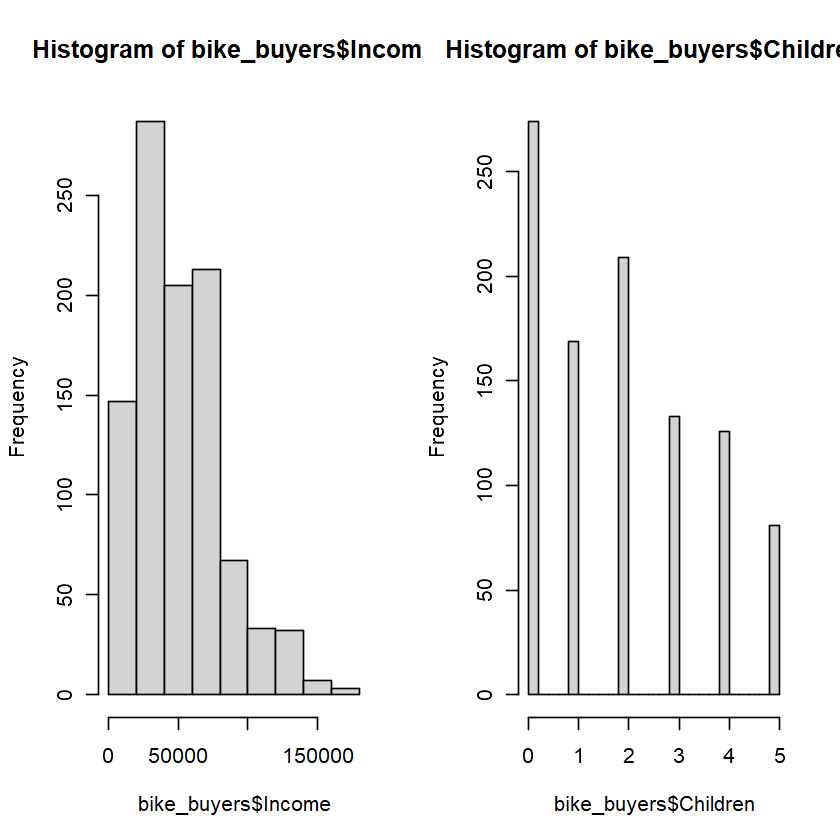

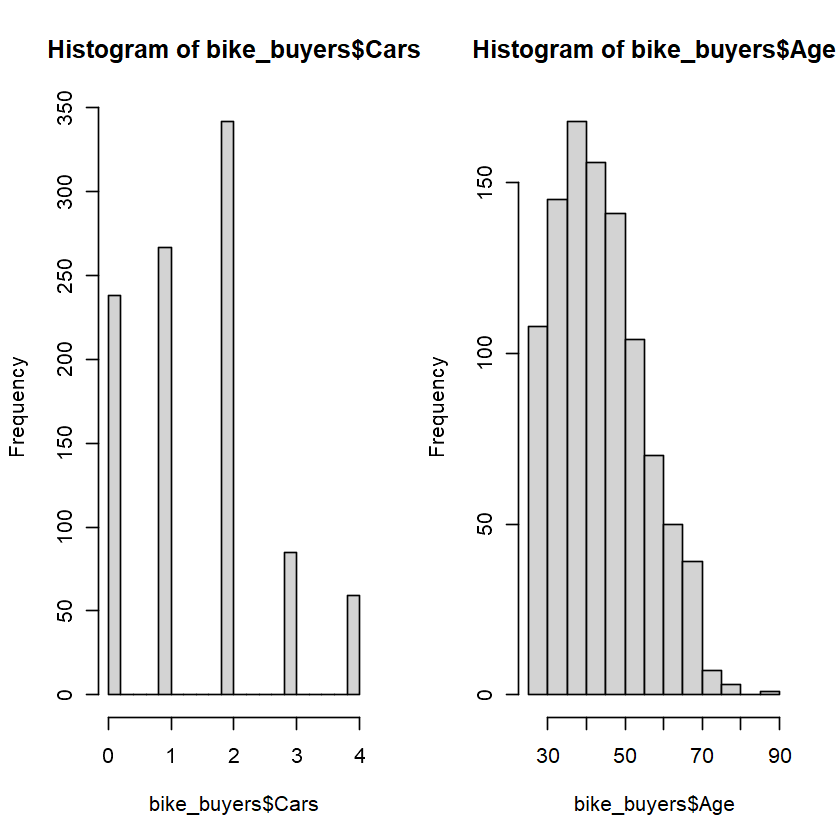

In [18]:
options(jupyter.plot_scale=1)
par(mfrow=c(1,2))
hist(bike_buyers$Income)
hist(bike_buyers$Children, breaks = 20)
hist(bike_buyers$Cars, breaks = 15)
hist(bike_buyers$Age)